In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
df = pd.read_csv('News.csv')
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4817 non-null   int64 
 1   news_headline  4817 non-null   object
 2   news_article   4817 non-null   object
 3   news_category  4817 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.7+ KB


In [100]:
df['news_category'].value_counts()

world            1021
entertainment     998
sports            856
technology        751
politics          546
science           389
automobile        256
Name: news_category, dtype: int64

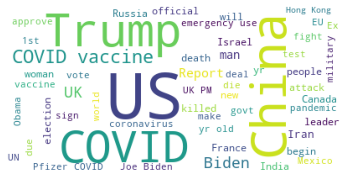

In [101]:
wc = WordCloud(background_color='white',min_font_size=10)
wc.generate(" ".join(df[df['news_category']=='world']['news_headline']))
plt.imshow(wc)
plt.axis('off')
plt.show()

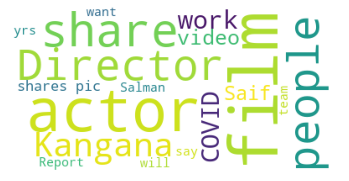

In [102]:
wc = WordCloud(background_color='white',min_font_size=10)
wc.generate(" ".join(df[df['news_category']=='entertainment']['news_headline']))
plt.imshow(wc)
plt.axis('off')
plt.show()

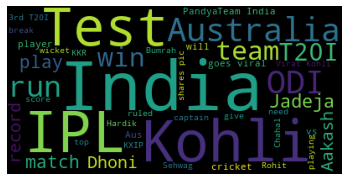

In [103]:
wc = WordCloud(min_font_size=10)
wc.generate(" ".join(df[df['news_category']=='sports']['news_headline']))
plt.imshow(wc)
plt.axis('off')
plt.show()

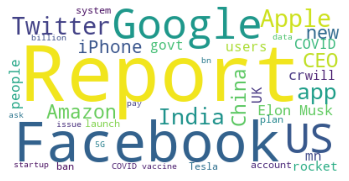

In [104]:
wc = WordCloud(background_color='white',min_font_size=10)
wc.generate(" ".join(df[df['news_category']=='technology']['news_headline']))
plt.imshow(wc)
plt.axis('off')
plt.show()

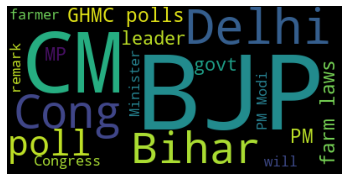

In [105]:
wc = WordCloud(min_font_size=10)
wc.generate(" ".join(df[df['news_category']=='politics']['news_headline']))
plt.imshow(wc)
plt.axis('off')
plt.show()

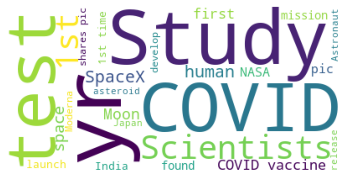

In [106]:
wc = WordCloud(background_color='white',min_font_size=10)
wc.generate(" ".join(df[df['news_category']=='science']['news_headline']))
plt.imshow(wc)
plt.axis('off')
plt.show()

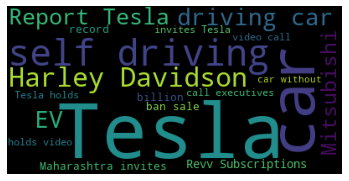

In [107]:
wc = WordCloud(min_font_size=10)
wc.generate(" ".join(df[df['news_category']=='automobile']['news_headline']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [108]:
def cleantext(text):
  token = word_tokenize(text.lower())
  ftoken = [t for t in token if (t.isalpha())]
  stopword = stopwords.words('english')
  ctoken = [t for t in ftoken if (t not in stopword)]
  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(t) for t in ctoken]

  return " ".join(ltoken)

In [109]:
df['news_headline'] = df['news_headline'].apply(cleantext)

In [110]:
df['news_headline']

0          problem biology solved artificial intelligence
1       microsoft team stop working internet explorer nov
2       hope u wo erect barrier cooperation china blac...
3             global smartphone sale fall cr unit gartner
4       eu hoping biden clarify u position digital tax...
                              ...                        
4812    astrazeneca test combining oxford vaccine sput...
4813                  humanity face temperature warns wef
4814               object outweigh living thing end study
4815         iucn list specie european bison see recovery
4816    india historically responsible climate change ...
Name: news_headline, Length: 4817, dtype: object

In [111]:
x = df['news_headline']
y = df['news_category']

In [112]:
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [113]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [114]:
def mymodel(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  print(classification_report(ytest,ypred))
  return model

In [115]:
rf = RandomForestClassifier()

In [116]:
rf = mymodel(rf)

               precision    recall  f1-score   support

   automobile       0.87      0.95      0.90        75
entertainment       0.84      0.96      0.90       289
     politics       0.99      0.88      0.93       168
      science       0.89      0.92      0.91       111
       sports       0.97      0.92      0.94       273
   technology       0.90      0.77      0.83       220
        world       0.90      0.95      0.92       310

     accuracy                           0.91      1446
    macro avg       0.91      0.91      0.91      1446
 weighted avg       0.91      0.91      0.91      1446



In [119]:
news = [input('News Headline : ')]

news_p = cv.transform(news).toarray()
prediction = rf.predict(news_p)

print('News Category : ',prediction)

News Headline : The BJP party has been elected for the government formation
News Category :  ['politics']
